In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df=pd.read_csv("train.csv")

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


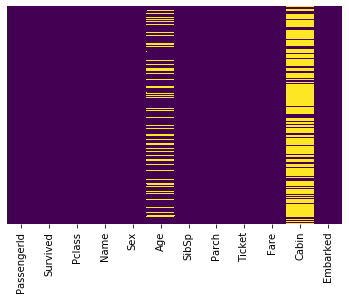

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

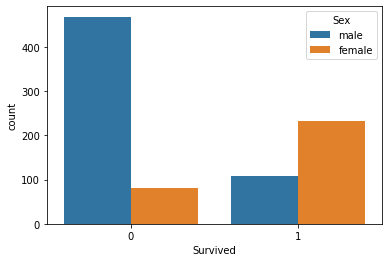

In [31]:
sns.countplot(x="Survived",data=df,hue="Sex")

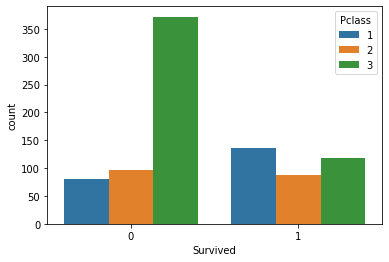

In [32]:
sns.countplot(x="Survived",data=df,hue="Pclass")

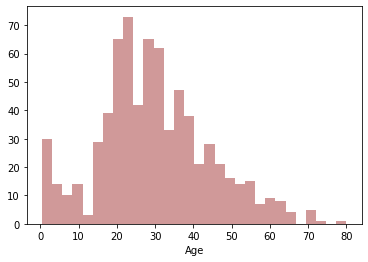

In [33]:
sns.distplot(df["Age"],kde=False,color="darkred",bins=30)

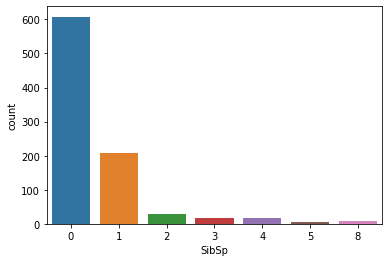

In [34]:
sns.countplot(x="SibSp",data=df)

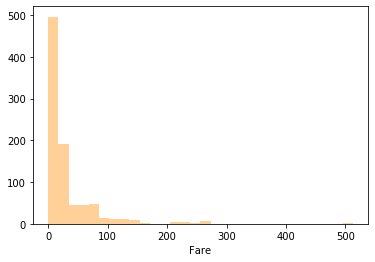

In [35]:
sns.distplot(df["Fare"],kde=False,color="darkorange",bins=30)

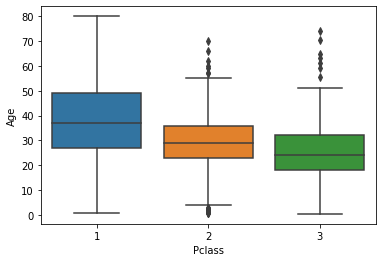

In [36]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [37]:
meaning=df["Age"].mean()

In [38]:
df["Age"].fillna(value=meaning,inplace=True)

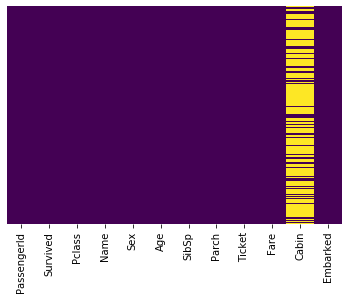

In [39]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [40]:
df.drop("Cabin",axis=1,inplace=True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)

In [43]:
Embark=pd.get_dummies(df["Embarked"],drop_first=True)

In [44]:
df=pd.concat([Sex,Embark,df],axis=1)

In [45]:
df.drop(["Name","Sex","Embarked"],axis=1,inplace=True)

In [46]:
df.head()

,male,Q,S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,1,0,1,1,0,3,22.0,1,0,A/5 21171,7.2500
1,0,0,0,2,1,1,38.0,1,0,PC 17599,71.2833
2,0,0,1,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,0,0,1,4,1,1,35.0,1,0,113803,53.1000
4,1,0,1,5,0,3,35.0,0,0,373450,8.0500


In [47]:
df.drop("Ticket",axis=1,inplace=True)

In [48]:
df.describe()

,male,Q,S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.086420,0.722783,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.477990,0.281141,0.447876,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,1.000000,0.000000,1.000000,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,0.000000,1.000000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [50]:
test=pd.read_csv("test.csv")

In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
test["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
         return Age


In [55]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [56]:
Emarko=pd.get_dummies(test["Embarked"],drop_first=True)
Sexting=pd.get_dummies(test["Sex"],drop_first=True)

In [57]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [58]:
test=pd.concat([Sexting,Emarko,test],axis=1)
test.drop(["Sex","Name"],axis=1,inplace=True)

In [59]:
test.head()

,male,Q,S,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,892,3,34.5,0,0,330911,7.8292,NaN,Q
1,0,0,1,893,3,47.0,1,0,363272,7.0000,NaN,S
2,1,1,0,894,2,62.0,0,0,240276,9.6875,NaN,Q
3,1,0,1,895,3,27.0,0,0,315154,8.6625,NaN,S
4,0,0,1,896,3,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
test.head()

,male,Q,S,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,892,3,34.5,0,0,330911,7.8292,NaN,Q
1,0,0,1,893,3,47.0,1,0,363272,7.0000,NaN,S
2,1,1,0,894,2,62.0,0,0,240276,9.6875,NaN,Q
3,1,0,1,895,3,27.0,0,0,315154,8.6625,NaN,S
4,0,0,1,896,3,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 30.7+ KB


In [62]:
test.drop("Embarked",axis=1,inplace=True)

In [63]:
test.head(2)

,male,Q,S,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,1,0,892,3,34.5,0,0,330911,7.8292,NaN
1,0,0,1,893,3,47.0,1,0,363272,7.0000,NaN


In [64]:
test.isnull().sum()

male             0
Q                0
S                0
PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
dtype: int64

In [65]:
mening=test["Fare"].mean()

In [66]:
test["Fare"].fillna(mening,inplace=True)

In [67]:
test.isnull().sum()

male             0
Q                0
S                0
PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
dtype: int64

In [68]:
test["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [69]:
X=df.drop(["Survived","PassengerId"],axis=1)

In [70]:
y=df["Survived"]

In [71]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])


In [73]:
print(X_train)

     male  Q  S  Pclass   Age  SibSp  Parch     Fare
0       1  0  1       3  22.0      1      0   7.2500
1       0  0  0       1  38.0      1      0  71.2833
2       0  0  1       3  26.0      0      0   7.9250
4       1  0  1       3  35.0      0      0   8.0500
6       1  0  1       1  54.0      0      0  51.8625
..    ... .. ..     ...   ...    ...    ...      ...
884     1  0  1       3  25.0      0      0   7.0500
885     0  1  0       3  39.0      0      5  29.1250
886     1  0  1       2  27.0      0      0  13.0000
887     0  0  1       1  19.0      0      0  30.0000
890     1  1  0       3  32.0      0      0   7.7500

[594 rows x 8 columns]


In [74]:
print(y_train)

0      0
1      1
2      1
4      0
6      0
      ..
884    0
885    0
886    0
887    1
890    0
Name: Survived, Length: 594, dtype: int64


In [75]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [76]:
#print(X_train)

In [77]:
#print(X_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc= RandomForestClassifier()

In [80]:
rfc=RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

In [81]:
rfc=rfc.fit(X_train, y_train)

In [82]:
predictions=rfc.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       178
           1       0.87      0.72      0.79       119

    accuracy                           0.85       297
   macro avg       0.85      0.82      0.83       297
weighted avg       0.85      0.85      0.84       297



In [85]:
print(confusion_matrix(y_test,predictions))

[[165  13]
 [ 33  86]]


In [86]:
print(accuracy_score(y_test,predictions))

0.8451178451178452


In [87]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid=GridSearchCV(rfc,param_grid,verbose=1,cv=5)

In [90]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_split=10,
                                              n_estimators=700, n_jobs=-1,
                                              oob_score=True, random_state=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=1)

In [91]:
grid.best_params_

{'max_features': 'log2', 'n_estimators': 700}

In [92]:
rfc_1=RandomForestClassifier(n_estimators=700,max_features="log2")

In [93]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=700)

In [94]:
predictions_1=rfc.predict(X_test)

In [95]:
predictions_1.shape

(297,)

In [96]:
y_test.shape

(297,)

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ad=AdaBoostClassifier(base_estimator=rfc,n_estimators=10)

In [99]:
ad.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_split=10,
                                                         n_estimators=700,
                                                         n_jobs=-1,
                                                         oob_score=True,
                                                         random_state=1),
                   n_estimators=10)

In [100]:
predictions_1=rfc.predict(X_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score

In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       178
           1       0.87      0.72      0.79       119

    accuracy                           0.85       297
   macro avg       0.85      0.82      0.83       297
weighted avg       0.85      0.85      0.84       297



In [103]:
print(confusion_matrix(y_test,predictions))

[[165  13]
 [ 33  86]]


In [104]:
print(accuracy_score(y_test,predictions))

0.8451178451178452


In [105]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       178
           1       0.87      0.72      0.79       119

    accuracy                           0.85       297
   macro avg       0.85      0.82      0.83       297
weighted avg       0.85      0.85      0.84       297



In [106]:
print(accuracy_score(y_test,predictions_1))

0.8451178451178452


In [107]:
print(confusion_matrix(y_test,predictions_1))

[[165  13]
 [ 33  86]]


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
search_random = {'n_estimators': range(1000, 5000, 100), 'learning_rate':[0.01, 0.1, 0.05]}

In [110]:
abc = GradientBoostingClassifier()

In [111]:
abc.fit(X_train, y_train)

GradientBoostingClassifier()

In [112]:
abc_predict = abc.predict(X_test)

In [113]:
print(classification_report(y_test,abc_predict))
print(confusion_matrix(y_test,abc_predict))
print(accuracy_score(y_test,abc_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       178
           1       0.81      0.67      0.73       119

    accuracy                           0.80       297
   macro avg       0.81      0.78      0.79       297
weighted avg       0.81      0.80      0.80       297

[[159  19]
 [ 39  80]]
0.8047138047138047


In [114]:
grid=GridSearchCV(abc,search_random,verbose=1,cv=5)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [ ]:
pru=grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pru))

In [ ]:
print(accuracy_score(y_test,pru))

In [ ]:
pred_test=test.drop("PassengerId",axis=1)

In [ ]:
test["PassengerId"]

In [ ]:
pred_test.drop("Ticket",axis=1,inplace=True)

In [ ]:
pred_test.drop("Cabin",axis=1,inplace=True)

In [ ]:
X.info()

In [ ]:
X.info()

In [ ]:
predicting=rfc.predict(pred_test)

In [ ]:
predicting.shape

In [ ]:
submissioning=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":predicting})

In [ ]:
submissioning.head()

In [ ]:
submissioning=submissioning.set_index(test["PassengerId"])

In [ ]:
submissioning.head()

In [ ]:
submissioning=submissioning.set_index("PassengerId")

In [ ]:
submissioning.head()

In [ ]:
submissioning.to_csv("999.csv")